### Datasets Analyzed
- IMDB Title Basics
- IMDB Title Ratings

# Q1 - What is the distribution for movies in each genre? What are the top 3 genres that film studios create the most?

### Import Necessary Libraries

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import IMDB Title Basics

In [222]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', 
                                compression='gzip', 
                                header=0, 
                                sep=',', 
                                quotechar='"', 
                                error_bad_lines=False)
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [223]:
round(imdb_title_basics.describe(),2)

,start_year,runtime_minutes
count,146144.00,114405.00
mean,2014.62,86.19
std,2.73,166.36
min,2010.00,1.00
25%,2012.00,70.00
50%,2015.00,87.00
75%,2017.00,99.00
max,2115.00,51420.00


### Import IMDB Title Ratings

In [224]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', 
                                 compression='gzip', 
                                 header=0, 
                                 sep=',', 
                                 quotechar='"', 
                                 error_bad_lines=False)
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [225]:
round(imdb_title_ratings.describe(), 2)

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


### Merge the IMDB Title Basics with IMDB Title Ratings

In [226]:
imdb_merged = pd.merge(imdb_title_basics, imdb_title_ratings, how='inner')
imdb_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Cleaning the Genres Column 

In [227]:
imdb_merged.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [228]:
# Calculating what percentage of values in this column are NA
print('Number of Duplicates:', imdb_merged['genres'].isna().sum())
# .value_counts(normalize=True)

Number of Duplicates: 804


In [229]:
# only 1% of data is NA, decided to drop them
imdb_merged['genres'].dropna(inplace=True)
print('Duplicates Remaining:',imdb_merged['genres'].isna().sum())

Duplicates Remaining: 0


### Filtered our Dataset

In [230]:
# convert start year into integer
imdb_merged['start_year'].astype('int64')

0        2013
1        2019
2        2018
3        2018
4        2017
         ... 
73851    2019
73852    2019
73853    2017
73854    2019
73855    2019
Name: start_year, Length: 73856, dtype: int64

In [231]:
# we analyzed only movies with above a certain number of votes
# start year after 2010
# number of votes above 14 (Q1 - Q4)

imdb_filtered = imdb_merged.loc[(imdb_merged['start_year'] >= 2010) 
                                & (imdb_merged['numvotes'] > 14)]
imdb_filtered.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32


In [232]:
# manually created a list of genres
list_of_genres = ['Action','Crime','Drama','Biography','Comedy','History','Animation','Sci-Fi',
                  'Fantasy','Romance','Horror','Adventure','Thriller','Music','War','Western',
                  'Sport','Documentary','Family','Musical','Reality-TV','News','Game-Show','Short']

# created a function to count the movies with that genre
def filtered_genres(list_of_genres, column):
    dict = {}
    for genre in list_of_genres:
        for row in column:
            if genre in row:
                if genre in dict:
                    dict[genre] += 1
                else:
                    dict[genre] = 1
    return dict

filtered_genres_cat = filtered_genres(list_of_genres, imdb_merged['genres'])
filtered_genres_cat

{'Action': 6988,
 'Crime': 4611,
 'Drama': 30788,
 'Biography': 3809,
 'Comedy': 17290,
 'History': 2825,
 'Animation': 1743,
 'Sci-Fi': 2206,
 'Fantasy': 2126,
 'Romance': 6589,
 'Horror': 7674,
 'Adventure': 3817,
 'Thriller': 8217,
 'Music': 2644,
 'War': 853,
 'Western': 280,
 'Sport': 1179,
 'Documentary': 17753,
 'Family': 3412,
 'Musical': 721,
 'Reality-TV': 17,
 'News': 579,
 'Game-Show': 2,
 'Short': 1}

In [233]:
# converted dictionary into a dataframe and sorted by descending
genre_df = pd.DataFrame.from_dict(filtered_genres_cat.items())
genre_df.columns = ['Genre','Count']
genre_df.sort_values(by='Count',ascending=False,inplace=True)

#created new column to get the percentage of each genre
genre_df['Percentage (%)'] = round(genre_df['Count'] / (genre_df['Count'].sum()) * 100,2)
genre_df

,Genre,Count,Percentage (%)
2,Drama,30788,24.41
17,Documentary,17753,14.08
4,Comedy,17290,13.71
12,Thriller,8217,6.52
10,Horror,7674,6.08
0,Action,6988,5.54
9,Romance,6589,5.22
1,Crime,4611,3.66
11,Adventure,3817,3.03
3,Biography,3809,3.02


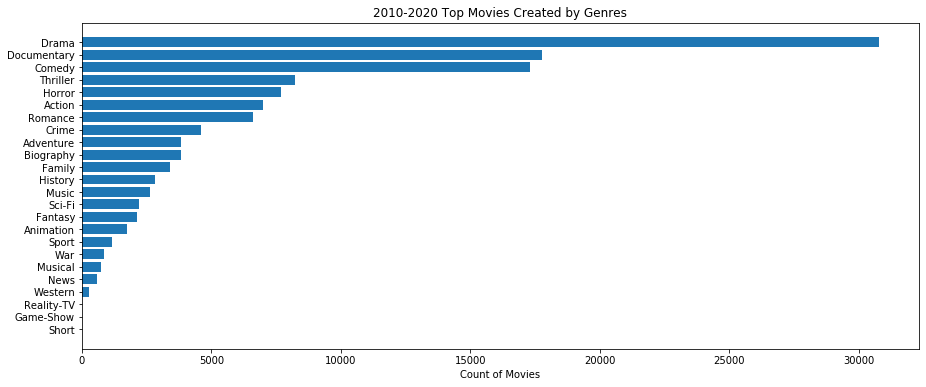

In [234]:
lists = sorted(filtered_genres_cat.items(), key=lambda x: x[1]) # sorted by key, return a list of tuples

plt.figure(figsize=(15,6))
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.barh(x, y)
plt.title('2010-2020 Top Movies Created by Genres')
plt.xlabel('Count of Movies',fontsize=10)
plt.show()

### Q1 - Conclusion

Film studios prefer to create Drama films. To confirm this in a later analysis, we can confirm the top highly voted films come from international films and they prefer Drama. The next saturated film genre is Documentary. Documentaries are not included in the top popular and highly rated films, but they are made the most second to Drama.